In [1]:
import sys
import os
sys.path.append(os.environ["HOME"]+"/.local/lib/python3.9/site-packages")

import scanpy as sc, anndata as ad
import harmonypy
import leidenalg

sc.logging.print_versions()

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                 8.3.1
anyio               NA
attr                21.2.0
babel               2.9.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.2
brotli              NA
certifi             2022.12.07
cffi                1.14.6
chardet             4.0.0
charset_normalizer  2.0.0
cloudpickle         1.6.0
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.06.2
dateutil            2.8.2
debugpy             1.6.7
decorator           5.0.9
defusedxml          0.7.1
entrypoints         0.3
fastjsonschema      NA
fsspec              2021.07.0
google              NA
h5py                3.3.0
harmonypy           NA
idna                3.1
igraph              0.11.5
ipykernel           6.17.1
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              3.0.1
joblib              1.0.1
json5               NA
j

In [30]:
adata = sc.read_h5ad("test_data1.h5ad")

In [21]:
## print dataset dimensions
#adata

## print cell info
adata.obs

,n_counts,n_genes,rand_obs
AAACCTGGTATCACCA,4609.0,1793,0.005074
AAACGGGCATGATCCA,1422.0,598,0.021717
AAGGTTCGTAAGTTCC,4882.0,1749,0.013132
ACGATACAGACGACGT,5675.0,2183,0.011300
ACGATACTCGGAGGTA,4034.0,1469,0.001196
...,...,...,...
TGTTCCGAGTATGACA,7225.0,2264,0.004397
TGTTCCGGTAGCGCAA,6201.0,1970,0.013950
TTAACTCAGATGTGTA,3091.0,1226,0.021168
TTCTACATCAAACAAG,10879.0,2934,0.021204


/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


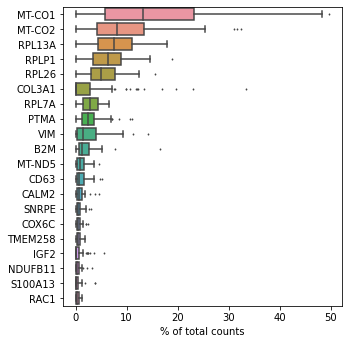

In [31]:
# Filtering cells with high mitochondria gene expression

sc.pl.highest_expr_genes(adata, n_top=20)

In [32]:
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

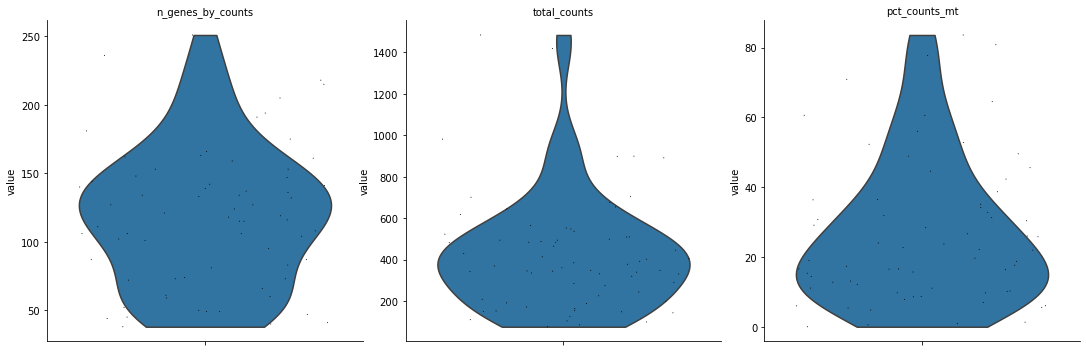

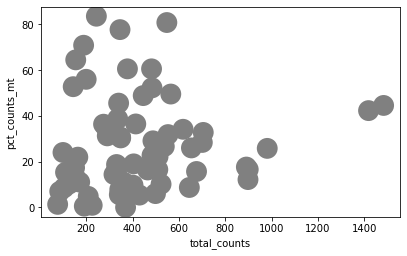

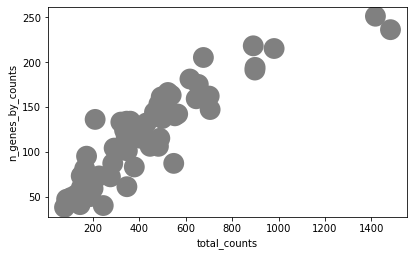

In [33]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [34]:
## Identifying highly variable genes
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) # normalize to 10,000 reads/cell
sc.pp.log1p(adata) # log transform

In [35]:
adata.var

,gene_ids,feature_types,n_counts,n_cells,rand_vars,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
CDK11A,ENSG00000008128,Gene Expression,225.0,210,0.007586,False,5,0.086957,92.753623,6.0
LRRC47,ENSG00000130764,Gene Expression,306.0,274,0.059393,False,9,0.130435,86.956522,9.0
KLHL21,ENSG00000162413,Gene Expression,108.0,101,0.024875,False,1,0.014493,98.550725,1.0
SRM,ENSG00000116649,Gene Expression,897.0,624,0.029172,False,15,0.289855,78.260870,20.0
PLOD1,ENSG00000083444,Gene Expression,445.0,370,0.012117,False,14,0.260870,79.710145,18.0
...,...,...,...,...,...,...,...,...,...,...
FTCD,ENSG00000160282,Gene Expression,33.0,24,0.037056,False,0,0.000000,100.000000,0.0
DIP2A,ENSG00000160305,Gene Expression,308.0,274,0.005652,False,8,0.130435,88.405797,9.0
MT-CO1,ENSG00000198804,Gene Expression,171375.0,2055,0.016236,True,68,68.971016,1.449275,4759.0
MT-CO2,ENSG00000198712,Gene Expression,108272.0,2035,0.058923,True,65,45.463768,5.797101,3137.0


In [38]:
sc.pp.highly_variable_genes(adata, n_top_genes=500)

genes = ["GCG", "TTR",  "IAPP",  "GHRL", "PPY", "COL3A1",
    "CPA1", "CLPS", "REG1A", "CTRB1", "CTRB2", "PRSS2", "CPA2", "KRT19", "INS","SST","CELA3A", "VTCN1"]

adata_var = adata[:, (adata.var.index.isin(genes) | adata.var["highly_variable"])]

In [39]:
adata_var.var

,gene_ids,feature_types,n_counts,n_cells,rand_vars,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
CDK11A,ENSG00000008128,Gene Expression,225.0,210,0.007586,False,5,0.086957,92.753623,6.0,True,9.695418e-01,3.373455,-0.145368
LRRC47,ENSG00000130764,Gene Expression,306.0,274,0.059393,False,9,0.130435,86.956522,9.0,True,1.693403e+00,4.207099,1.425450
SRM,ENSG00000116649,Gene Expression,897.0,624,0.029172,False,15,0.289855,78.260870,20.0,True,2.174858e+00,3.856656,0.273818
PLOD1,ENSG00000083444,Gene Expression,445.0,370,0.012117,False,14,0.260870,79.710145,18.0,True,2.419213e+00,4.903551,2.306324
CELA2A,ENSG00000142615,Gene Expression,2125.0,194,0.019168,False,5,0.623188,92.753623,43.0,True,3.011517e+00,6.683195,3.802178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FTCD,ENSG00000160282,Gene Expression,33.0,24,0.037056,False,0,0.000000,100.000000,0.0,True,1.000000e-12,NaN,NaN
DIP2A,ENSG00000160305,Gene Expression,308.0,274,0.005652,False,8,0.130435,88.405797,9.0,True,1.518527e+00,4.310510,1.694962
MT-CO1,ENSG00000198804,Gene Expression,171375.0,2055,0.016236,True,68,68.971016,1.449275,4759.0,True,7.339440e+00,6.911636,1.000000
MT-CO2,ENSG00000198712,Gene Expression,108272.0,2035,0.058923,True,65,45.463768,5.797101,3137.0,True,6.927213e+00,6.436065,0.707107


In [40]:
num_highly_variable_genes = sum(adata_var.var['highly_variable'])
print("Number of highly variable genes:", num_highly_variable_genes)

sorted_var = adata_var.var.sort_values(by='dispersions_norm', ascending=False)

top_5_variable_genes = sorted_var.head(5)
print("Top 5 most variable genes:")
print(top_5_variable_genes)

Number of highly variable genes: 585
Top 5 most variable genes:
                gene_ids    feature_types  n_counts  n_cells  rand_vars  \
CELA2A   ENSG00000142615  Gene Expression    2125.0      194   0.019168   
MXRA5    ENSG00000101825  Gene Expression     235.0      166   0.007493   
GNG13    ENSG00000127588  Gene Expression     127.0       21   0.069711   
TAOK3    ENSG00000135090  Gene Expression     638.0      484   0.012727   
HSD17B6  ENSG00000025423  Gene Expression      94.0       22   0.067812   

            mt  n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
CELA2A   False                  5     0.623188              92.753623   
MXRA5    False                  4     0.072464              94.202899   
GNG13    False                  1     0.086957              98.550725   
TAOK3    False                 12     0.260870              82.608696   
HSD17B6  False                  1     0.289855              98.550725   

         total_counts  highly_variable     mea

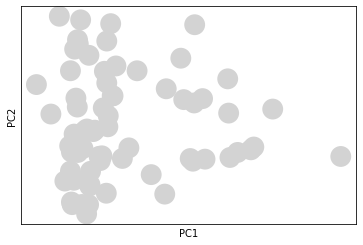

In [47]:
# Removing batch effects

sc.pp.pca(adata_var, n_comps=20)
sc.pl.pca(adata_var)

In [48]:
# Visualizing cell clusters
sc.pp.neighbors(adata_var) # computes neighborhood graphs. Needed to run clustering.
sc.tl.leiden(adata_var) # clusters cells based on expression profiles. This is needed to color cells by cluster.

In [49]:
# Import the "external" library
import scanpy.external as sce

# Run harmony using suggested params from the paper
sce.pp.harmony_integrate(adata_var, 'leiden', theta=2, nclust=50,  max_iter_harmony = 10,  max_iter_kmeans=10)

# Reset the original PCs to those computed by Harmony
adata_var.obsm['X_pca'] = adata_var.obsm['X_pca_harmony']

2024-05-22 20:14:13,169 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
Computing initial centroids with sklearn.KMeans...
2024-05-22 20:14:13,321 - harmonypy - INFO - sklearn.KMeans initialization complete.
sklearn.KMeans initialization complete.
2024-05-22 20:14:13,327 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2024-05-22 20:14:13,370 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2024-05-22 20:14:13,386 - harmonypy - INFO - Converged after 2 iterations
Converged after 2 iterations


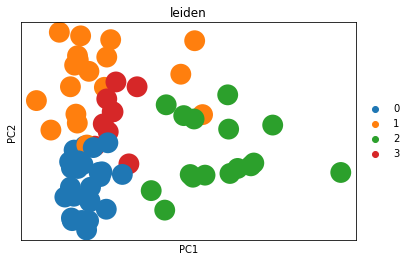

In [50]:
# Plot PCA after batch correction
sc.pl.pca(adata_var, color="leiden")

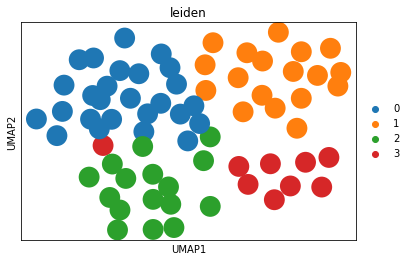

In [86]:
# UMAP

sc.tl.umap(adata_var) # compute UMAP embedding
sc.pl.umap(adata_var, color="leiden") # make the UMAP plot

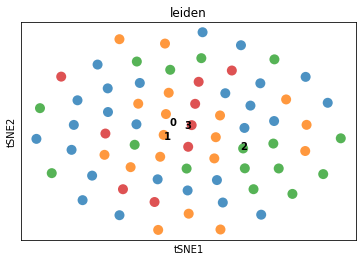

In [101]:
#tSNE

    sc.tl.tsne(adata_var, perplexity=500.0)
sc.pl.tsne(adata_var, color=['leiden'], legend_loc='on data', legend_fontsize=10, alpha=0.8, size=400)